In [63]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [51]:
# shape
# Load the data
dataset = read_csv("../data/data.csv")


# Clean the data
dataset = dataset.drop_duplicates()
dataset = dataset.drop(['Unnamed: 32', 'id'], axis=1)
dataset['diagnosis'] = dataset['diagnosis'].map({'M': 1, 'B': 0})
print(dataset.shape)

(569, 31)


In [52]:
# types
set_option('display.max_rows', 500)
print(dataset.dtypes)

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [53]:
# head
set_option('display.width', 100)
print(dataset.head(10))

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          1        17.99         10.38          122.80     1001.0            0.118   
1          1        20.57         17.77          132.90     1326.0            0.085   
2          1        19.69         21.25          130.00     1203.0            0.110   
3          1        11.42         20.38           77.58      386.1            0.142   
4          1        20.29         14.34          135.10     1297.0            0.100   
5          1        12.45         15.70           82.57      477.1            0.128   
6          1        18.25         19.98          119.60     1040.0            0.095   
7          1        13.71         20.83           90.20      577.9            0.119   
8          1        13.00         21.82           87.50      519.8            0.127   
9          1        12.46         24.04           83.97      475.9            0.119   

   compactness_mean  concavity_mean  conca

In [55]:
# descriptions, change precision to 3 places
set_option('display.precision', 3)
print(dataset.describe())

       diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
count    569.000      569.000       569.000         569.000    569.000          569.000   
mean       0.373       14.127        19.290          91.969    654.889            0.096   
std        0.484        3.524         4.301          24.299    351.914            0.014   
min        0.000        6.981         9.710          43.790    143.500            0.053   
25%        0.000       11.700        16.170          75.170    420.300            0.086   
50%        0.000       13.370        18.840          86.240    551.100            0.096   
75%        1.000       15.780        21.800         104.100    782.700            0.105   
max        1.000       28.110        39.280         188.500   2501.000            0.163   

       compactness_mean  concavity_mean  concave points_mean  symmetry_mean  ...  radius_worst  \
count           569.000         569.000              569.000        569.000  ...  

In [61]:
print(dataset.groupby('diagnosis').size())

diagnosis
0    357
1    212
dtype: int64


<Figure size 1400x1200 with 0 Axes>

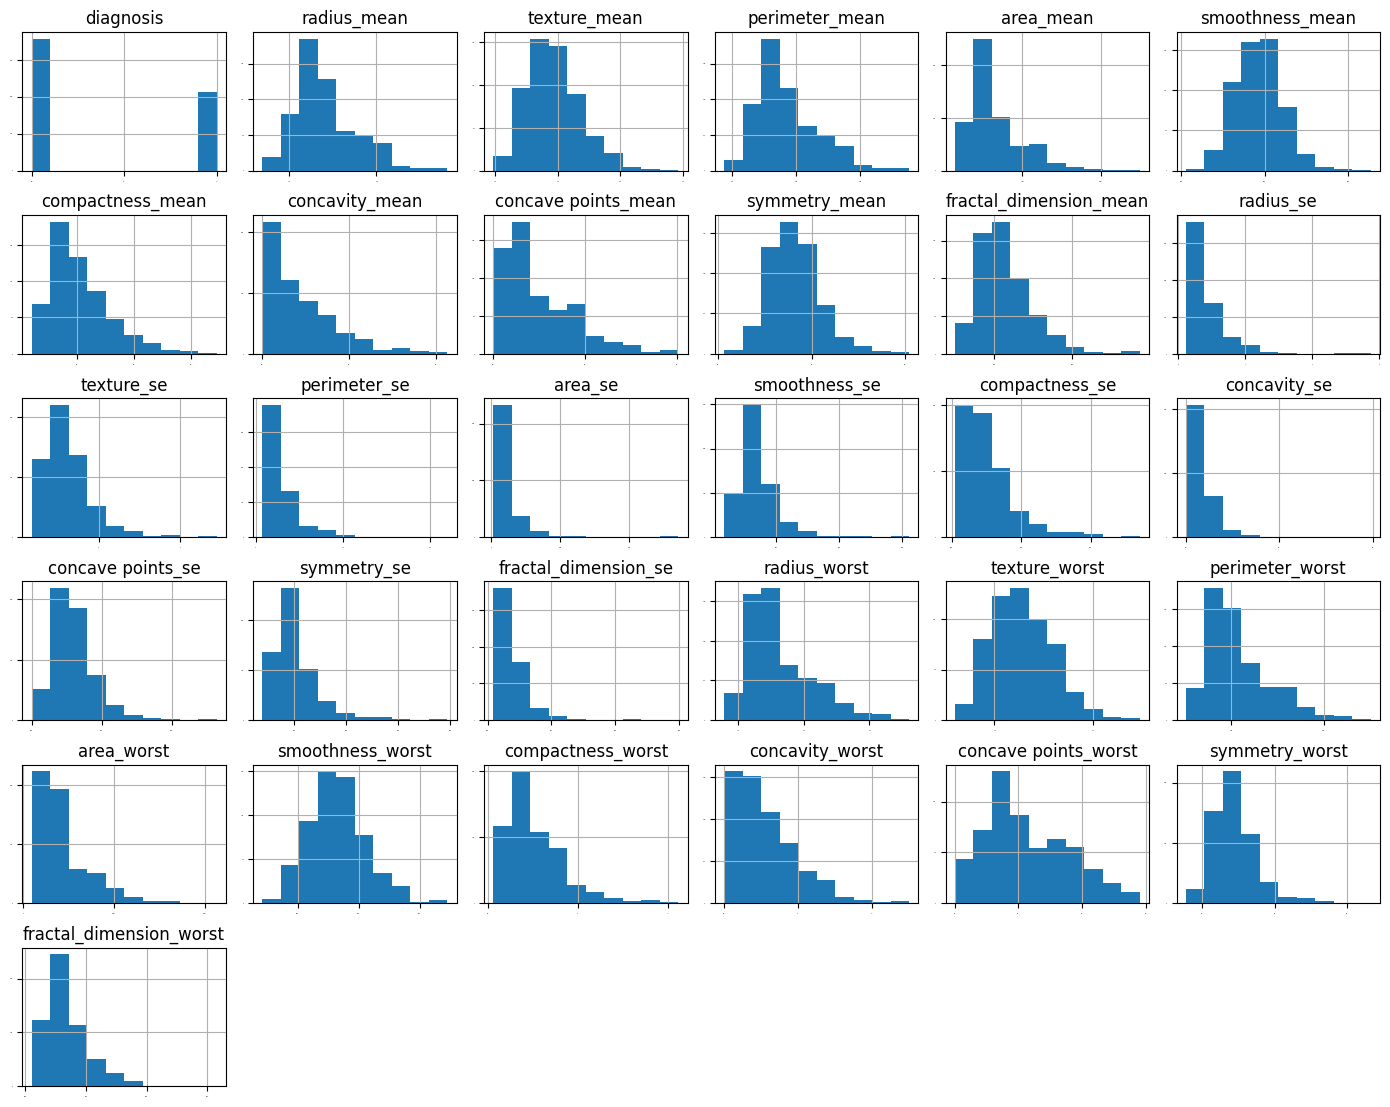

In [92]:
# histograms
plt.figure(figsize=(14, 12))
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(14, 12))

plt.tight_layout()
plt.subplots_adjust(top=0.9)

for ax in plt.gcf().axes:
    ax.title.set_size(12)

plt.show()

<Figure size 1400x1200 with 0 Axes>

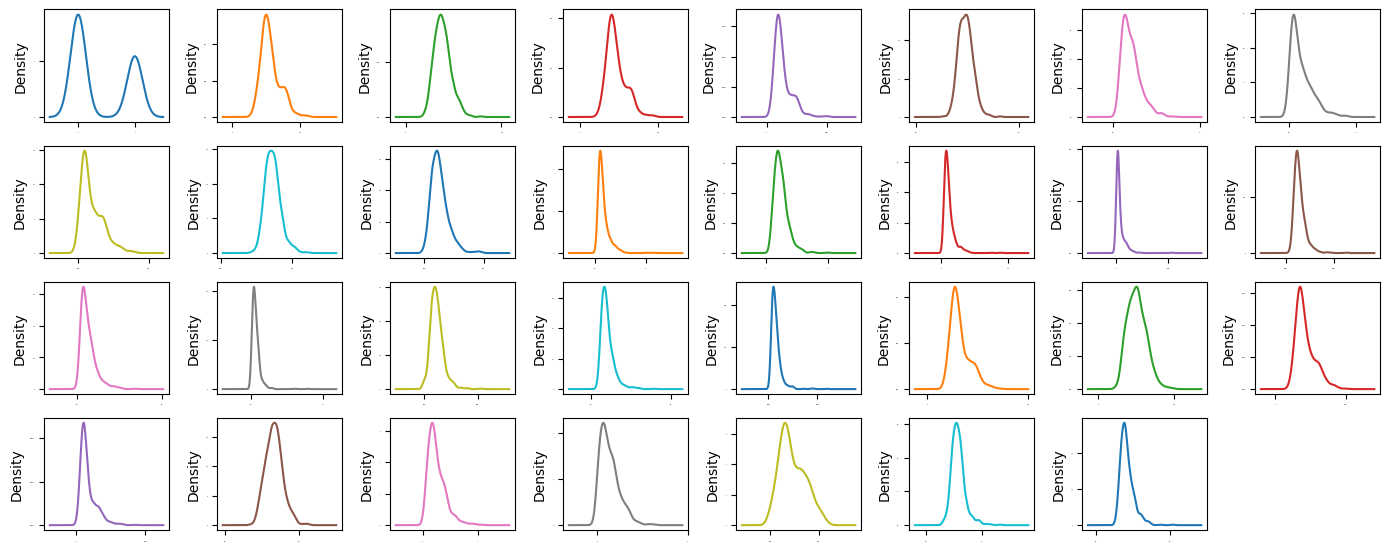

In [93]:
# density
plt.figure(figsize=(14, 12))
dataset.plot(kind='density', subplots=True, layout=(8,8),
            sharex=False, legend=False, fontsize=1, figsize=(14, 12))

plt.tight_layout()
plt.subplots_adjust(top=0.9)

for ax in plt.gcf().axes:
    ax.title.set_size(14)
    
plt.show()

<Figure size 1400x1200 with 0 Axes>

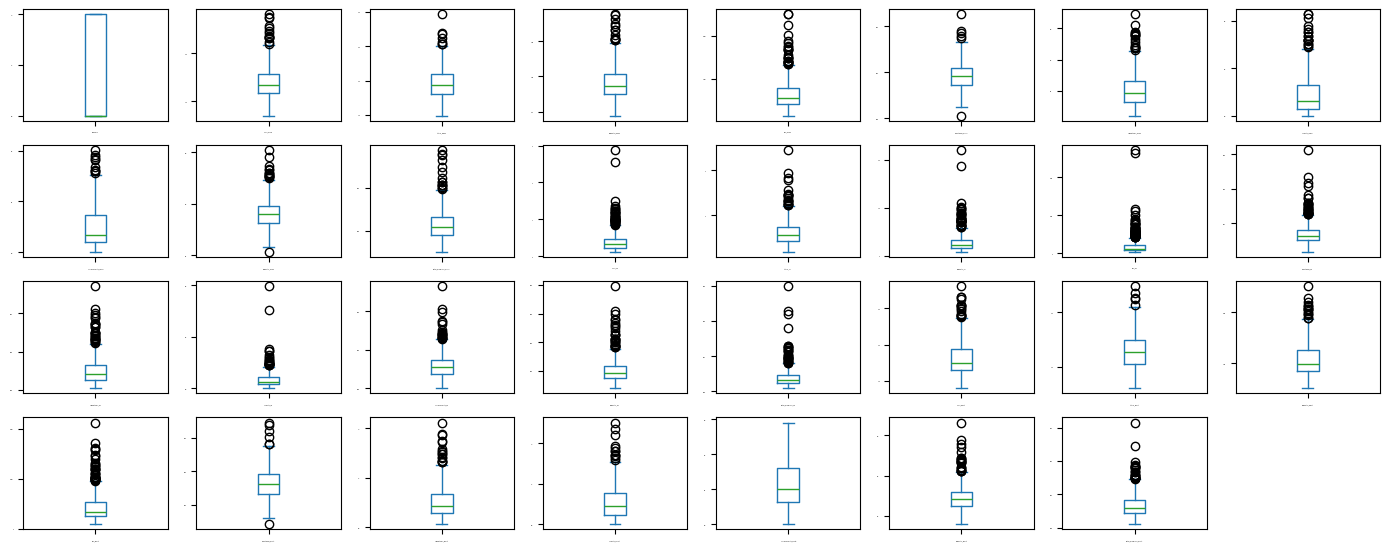

In [94]:
# density
plt.figure(figsize=(14, 12))
dataset.plot(kind='box', subplots=True, layout=(8,8),
            sharex=False, legend=False, fontsize=1, figsize=(14, 12))

plt.tight_layout()
plt.subplots_adjust(top=0.9)

for ax in plt.gcf().axes:
    ax.title.set_size(14)
    
plt.show()

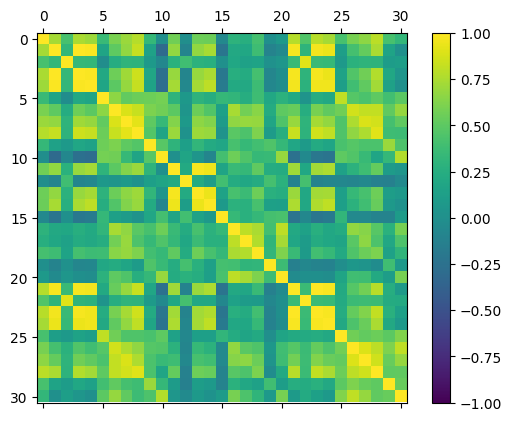

In [95]:
# correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
plt.show()

In [132]:
# Split-out validation dataset
array = dataset.values
X = dataset.drop(['diagnosis'], axis=1)
Y = dataset['diagnosis']

num_folds = 10
validation_size = 0.20
seed = 7


X_train, X_validation, Y_train, Y_validation = train_test_split(
                                    X, Y, test_size=validation_size, random_state=seed)

In [133]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression(max_iter=3500)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [134]:
# Evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = f"{name} {cv_results.mean():.4f} {cv_results.std():.4f}"
    print(msg)

LR 0.9493 0.0344
LDA 0.9580 0.0271
KNN 0.9362 0.0454
CART 0.9250 0.0361
NB 0.9337 0.0411
SVM 0.9073 0.0578


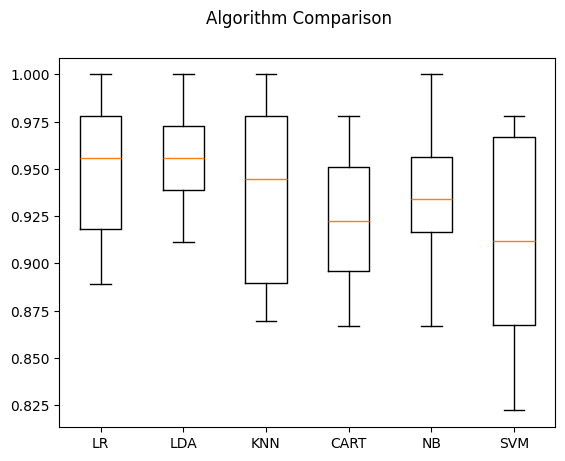

In [136]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Evaluate Algorithms: Standardize Data

In [137]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', 
            Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression(max_iter=3500))])))
pipelines.append(('ScaledLDA', 
            Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', 
            Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', 
            Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', 
            Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', 
            Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))


results = []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = f"{name} {cv_results.mean():.3f} ({cv_results.std():.3f})"
    print(msg)

ScaledLR 0.971 (0.022)
ScaledLDA 0.958 (0.027)
ScaledKNN 0.960 (0.031)
ScaledCART 0.923 (0.039)
ScaledNB 0.938 (0.043)
ScaledSVM 0.967 (0.018)


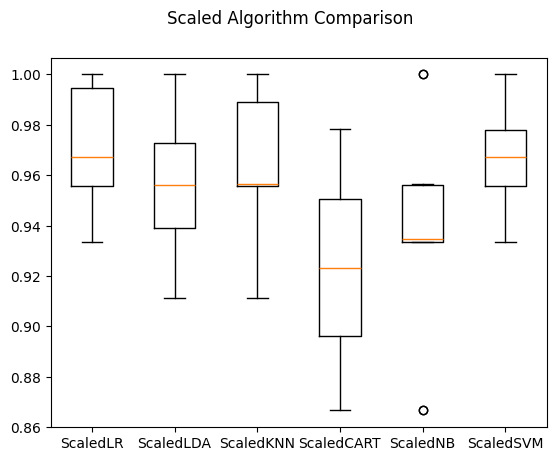

In [138]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### The Scaled Logistic Regression (LR) had the best trade-off between accuracy and stability. However, Scaled SVM is a close competitor in terms of performance.

In [145]:
# Finalize Model

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

model = LogisticRegression(max_iter=3500)
model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)

print(f"Accuracy of the model: {accuracy_score(Y_validation, predictions):.3f}")
print('----------------------\n')
print(f"Confusion matrix: \n {confusion_matrix(Y_validation, predictions)}")
print('----------------------\n')
print(f'Classification report: \n {classification_report(Y_validation, predictions)}')

Accuracy of the model: 0.982
----------------------

Confusion matrix: 
 [[74  0]
 [ 2 38]]
----------------------

Classification report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        74
           1       1.00      0.95      0.97        40

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



In [1]:
scaled_dict = {
    "a": 34,
    "b": 44,
}

print(scaled_dict.items())

dict_items([('a', 34), ('b', 44)])
